In [211]:
import torch
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
os.getcwd()

'C:\\Users\\chris\\Desktop\\210\\W210-Capstone\\models'

In [3]:
train = pd.read_csv("C:\\Users\\chris\\Desktop\\210\\W210-Capstone\\data\\TrainingData\\trainingWithItems.csv")

In [4]:
unemp = train[train['INDICATOR'] == "Unemployment"]
rgdp = train[train['INDICATOR'] == "RealGDP"]
cpce = train[train['INDICATOR'] == "Core PCE"]
ccpi = train[train['INDICATOR'] == "Core CPI"]
ngnp = train[train['INDICATOR'] == "NominalGNP"]
rgnp = train[train['INDICATOR'] == "RealGNP"]

In [165]:
unemp = unemp[unemp['YEAR BEING FORECAST'] != "2020"]

In [166]:
np.random.seed(0)
def model_setup(df):
    
    rand = df.sample(frac = 1)
    #80/20 split
    nrow = len(rand)
    train_prop = int(np.round(nrow*0.8))
    train = rand[:train_prop]
    val = rand[train_prop:]
    
    train = train[["FORECASTER ID", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF", "actual",
                  "chicken", "coffee", "eggs", "electricity", "rice", "unleadedGasoline"]]
    val = val[["FORECASTER ID", "MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF", "actual",
              "chicken", "coffee", "eggs", "electricity", "rice", "unleadedGasoline"]]
    
    return train.dropna(), val.dropna()

In [167]:
def model(x):
    return x @ w.t() + b

In [168]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [169]:
# train, val = model_setup(unemp)
# X_train, Y_train = train[["MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF",
#                          "chicken", "coffee", "eggs", "electricity", "rice", "unleadedGasoline"]], train["actual"]
# X_val, Y_val = val[["MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF",
#                    "chicken", "coffee", "eggs", "electricity", "rice", "unleadedGasoline"]], val["actual"]

data = unemp[["MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF", "actual",
                  "chicken", "coffee", "eggs", "electricity", "rice", "unleadedGasoline"]].dropna()
X, Y = data[["MAX", "pred_average", "pred_var", "HIT", "ACTUAL_CONF",
                  "chicken", "coffee", "eggs", "electricity", "rice", "unleadedGasoline"]], data[['actual']]

In [170]:
inputs = X.values
inputs = torch.from_numpy(inputs).float()

In [171]:
targets = Y.values
targets = torch.from_numpy(targets).float()

In [172]:
w = torch.randn(1, 11, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [173]:
losses = []
for i in range(10000):
    preds = model(inputs)
    loss = mse(preds, targets)
    losses.append(loss)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [174]:
loss

tensor(5.0086, grad_fn=<DivBackward0>)

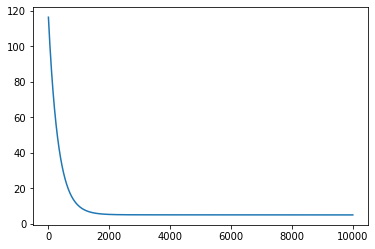

In [175]:
plt.plot(losses)

In [176]:
preds_array = preds.detach().numpy()

In [177]:
preds_array = preds_array.flatten()

In [236]:
mean_squared_error(preds_array, np.array(Y['actual'].tolist()))

5.008577454257108

In [238]:
mean_squared_error(X['pred_average'].tolist(), np.array(Y['actual'].tolist()))

5.743489403605204

In [237]:
np.corrcoef(preds_array, np.array(Y['actual'].tolist()))[0][1]

0.6134892909916111

In [239]:
np.corrcoef(X['pred_average'].tolist(), Y['actual'].tolist())[0][1]

0.630839249879817

In [178]:
diffs = np.subtract(preds_array, np.array(Y['actual'].tolist()))

In [179]:
actual_diffs = np.subtract(X['pred_average'].tolist(), np.array(Y['actual'].tolist()))

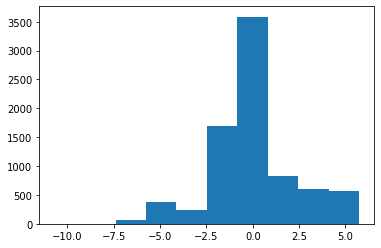

In [180]:
plt.hist(diffs)
plt.show()

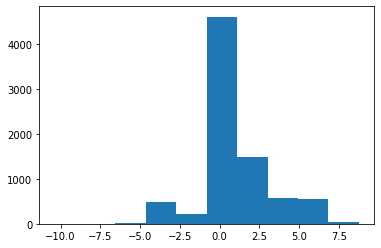

In [181]:
plt.hist(actual_diffs)
plt.show()

In [223]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [224]:
inputDim = 11        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [225]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [226]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(inputs.cuda())
        labels = Variable(targets.cuda())
    else:
        inputs = Variable(inputs)
        labels = Variable(targets)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(70.0723, grad_fn=<MseLossBackward>)
epoch 0, loss 70.072265625
tensor(25.6599, grad_fn=<MseLossBackward>)
epoch 1, loss 25.659873962402344
tensor(11.7899, grad_fn=<MseLossBackward>)
epoch 2, loss 11.789939880371094
tensor(7.4371, grad_fn=<MseLossBackward>)
epoch 3, loss 7.437109470367432
tensor(6.0512, grad_fn=<MseLossBackward>)
epoch 4, loss 6.051153659820557
tensor(5.5913, grad_fn=<MseLossBackward>)
epoch 5, loss 5.591345310211182
tensor(5.4218, grad_fn=<MseLossBackward>)
epoch 6, loss 5.42180871963501
tensor(5.3443, grad_fn=<MseLossBackward>)
epoch 7, loss 5.344334602355957
tensor(5.2971, grad_fn=<MseLossBackward>)
epoch 8, loss 5.297067165374756
tensor(5.2606, grad_fn=<MseLossBackward>)
epoch 9, loss 5.260637283325195
tensor(5.2289, grad_fn=<MseLossBackward>)
epoch 10, loss 5.228918075561523
tensor(5.1999, grad_fn=<MseLossBackward>)
epoch 11, loss 5.199912071228027
tensor(5.1729, grad_fn=<MseLossBackward>)
epoch 12, loss 5.172917366027832
tensor(5.1476, grad_fn=<MseLossBackw

In [227]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(inputs.cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(inputs)).data.numpy()

In [228]:
predicted = predicted.flatten()

In [229]:
diffs = np.subtract(predicted, Y['actual'].tolist())

(array([3.000e+00, 2.000e+00, 2.100e+01, 4.790e+02, 2.180e+02, 4.788e+03,
        1.277e+03, 4.690e+02, 6.640e+02, 4.700e+01]),
 array([-10.93089951,  -9.08603434,  -7.24116917,  -5.39630401,
         -3.55143884,  -1.70657367,   0.1382915 ,   1.98315667,
          3.82802183,   5.672887  ,   7.51775217]),
 <BarContainer object of 10 artists>)

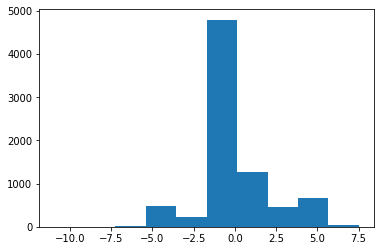

In [230]:
plt.hist(diffs)

(array([3.000e+00, 2.000e+00, 1.700e+01, 4.760e+02, 2.070e+02, 4.604e+03,
        1.482e+03, 5.650e+02, 5.610e+02, 5.100e+01]),
 array([-10.378333 ,  -8.4636247,  -6.5489164,  -4.6342081,  -2.7194998,
         -0.8047915,   1.1099168,   3.0246251,   4.9393334,   6.8540417,
          8.76875  ]),
 <BarContainer object of 10 artists>)

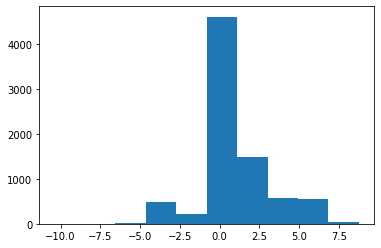

In [231]:
plt.hist(actual_diffs)

In [232]:
mean_squared_error(predicted, Y['actual'].tolist())

4.6710965114217835

In [233]:
mean_squared_error(X['pred_average'].tolist(), np.array(Y['actual'].tolist()))

5.743489403605204

In [234]:
np.corrcoef(predicted, Y['actual'].tolist())[0][1]

0.6469675642914335

In [235]:
np.corrcoef(X['pred_average'].tolist(), Y['actual'].tolist())[0][1]

0.630839249879817